In [1]:
import torch
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
torch.set_default_tensor_type(torch.FloatTensor)
device  = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load('model_snnet_trained.pkl')

In [2]:
import numpy as np
noesypr1d_10 = np.load(r'E:\Desktop\sennet\MTBLS242_noesypr1d_10.npy')
noesypr1d_10 -= noesypr1d_10[:,120000:121000].min(1).reshape(-1,1)
noesypr1d_10.shape

(10, 131072)

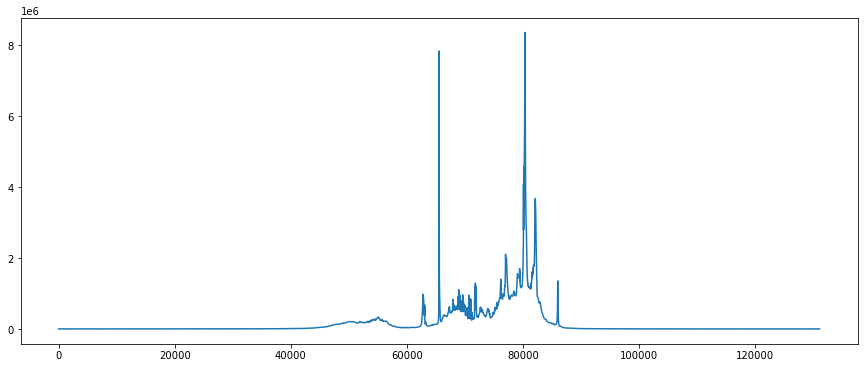

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(noesypr1d_10[0])
plt.show()

In [4]:
sw32 = np.linspace(0, 109182 - 21881, 109182 - 21881, endpoint=True) 
sw32_2 = np.linspace(0, 109182 - 21881, num=int(128*1024 ), endpoint=True) 
ppm_20 = np.linspace(14.7058, -5.3218, 128*1024)  

In [5]:
import time
noesy_20ppm = []
macro_all_n = []
small_all_n = []
model.eval()
start_time = time.time()
with torch.no_grad():
    noesypr1d_10_t = [np.interp(sw32_2, sw32, data[21881:109182]) for data in noesypr1d_10]
    noesypr1d_10_t = [(data - data[70000:120000].min()) / (data[70000:120000].max()) for data in noesypr1d_10_t]
    
    for spec_data in noesypr1d_10_t:   
        output_n = model(torch.from_numpy(spec_data).reshape(-1,1,128*1024).to(torch.float32).to(device)) 
        noesy_20ppm.append(spec_data)
        macro_all_n.append(output_n.cpu().numpy().reshape(-1,1))
        small_all_n.append(spec_data.reshape(-1,1)-output_n.cpu().numpy().reshape(-1,1))
        
end_time = time.time()
elapsed_time = end_time - start_time
print(f'cost time {elapsed_time:.6f} secs')     
macro_all_np = np.array(macro_all_n).reshape(-1, 128*1024)
small_all_np = np.array(small_all_n).reshape(-1, 128*1024)
noesy_20ppm_np = np.array(noesy_20ppm).reshape(-1, 128*1024)
print(macro_all_np.shape, small_all_np.shape, noesy_20ppm_np.shape)

cost time 10.072915 secs
(10, 131072) (10, 131072) (10, 131072)


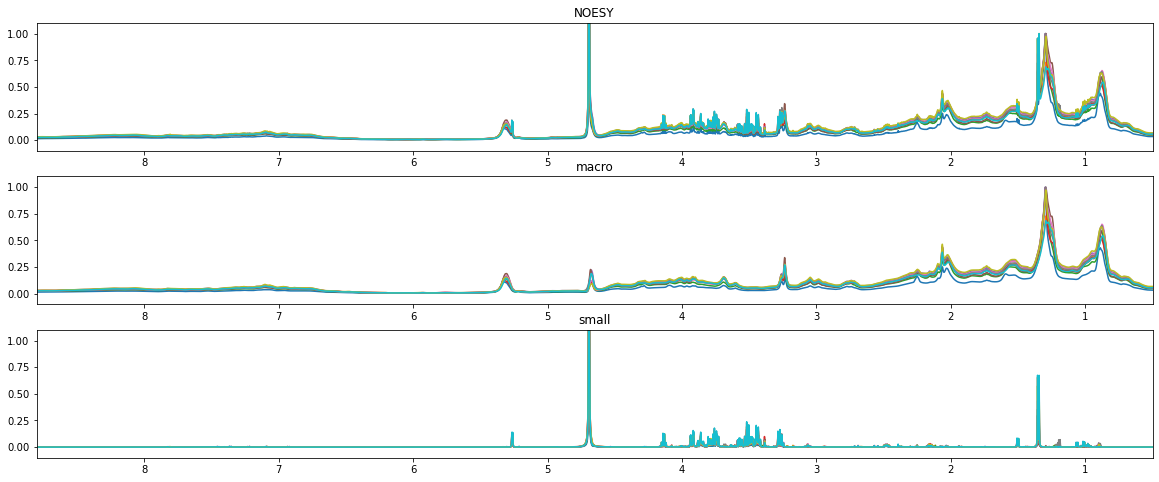

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.subplot(3, 1, 1)
plt.plot(ppm_20, noesy_20ppm_np.T)
plt.xlim(8.8, 0.5)
plt.ylim(-0.1,1.1)
plt.title('NOESY')
plt.subplot(3, 1, 2)
plt.plot(ppm_20, macro_all_np.T)
plt.xlim(8.8, 0.5)
plt.ylim(-0.1,1.1)
plt.title('macro')
plt.subplot(3, 1, 3)
plt.plot(ppm_20, small_all_np.T)
plt.xlim(8.8, 0.5)
plt.ylim(-0.1,1.1)
plt.title('small')
plt.show()

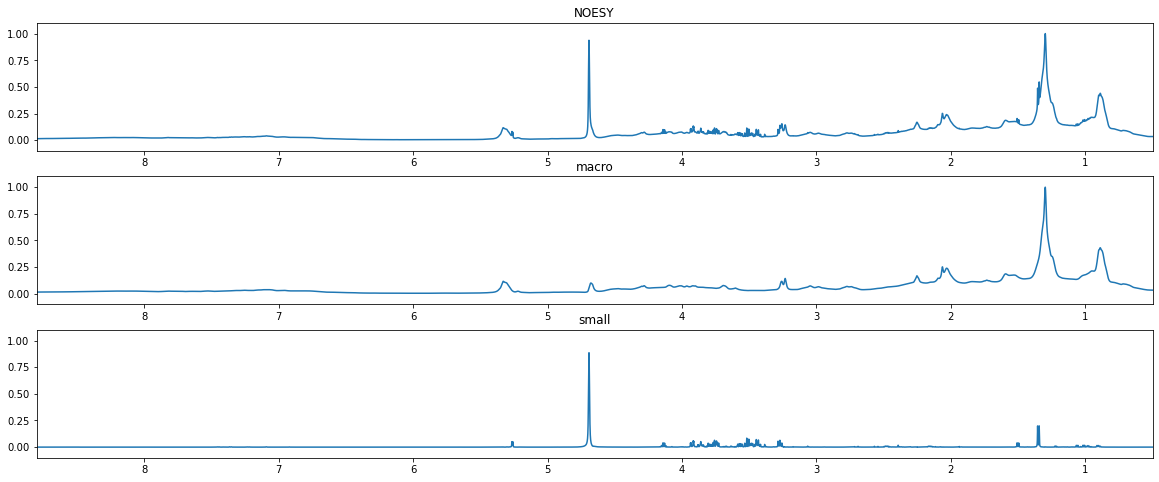

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.subplot(3, 1, 1)
plt.plot(ppm_20, noesy_20ppm_np[0])
plt.xlim(8.8, 0.5)
plt.ylim(-0.1,1.1)
plt.title('NOESY')
plt.subplot(3, 1, 2)
plt.plot(ppm_20, macro_all_np[0])
plt.xlim(8.8, 0.5)
plt.ylim(-0.1,1.1)
plt.title('macro')
plt.subplot(3, 1, 3)
plt.plot(ppm_20, small_all_np[0])
plt.xlim(8.8, 0.5)
plt.ylim(-0.1,1.1)
plt.title('small')
plt.show()

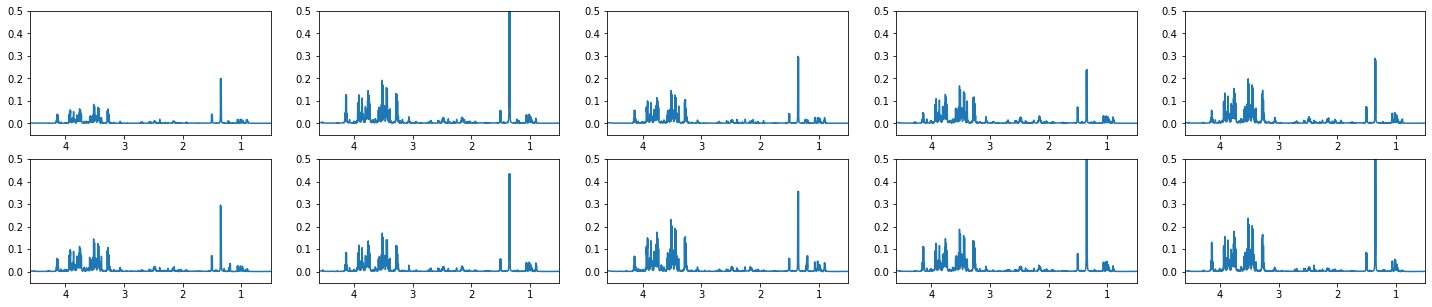

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 5))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(ppm_20, small_all_np[i])
    plt.ylim(-0.05, 0.5)
    plt.xlim(4.6, 0.5)   
plt.show()  